In [ ]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
dataset_name = 'Arctic Shelf Area, Arctic'
files = os.listdir('data/dfs_locais/')

In [ ]:
for file in files: 
    df = pd.read_csv(f'data/dfs_locais/{file}', index_col=0)
    filename = file.replace('.csv', '')
    df_edges = df.dropna(subset=['con.taxonomy', 'res.taxonomy'])

    edges = list(zip(df_edges['res.taxonomy'], df_edges['con.taxonomy']))
    g = ig.Graph.TupleList(edges, directed=True)

    g.es['interaction_type'] = df_edges['interaction.type'].tolist()

    res_map = pd.Series(df_edges['res.movement.type'].values, index=df_edges['res.taxonomy']).to_dict()
    con_map = pd.Series(df_edges['con.movement.type'].values, index=df_edges['con.taxonomy']).to_dict()

    movement_lookup = {**res_map, **con_map}
    g.vs['movement_type'] = [movement_lookup.get(name, "Unknown") for name in g.vs['name']]

    g.g

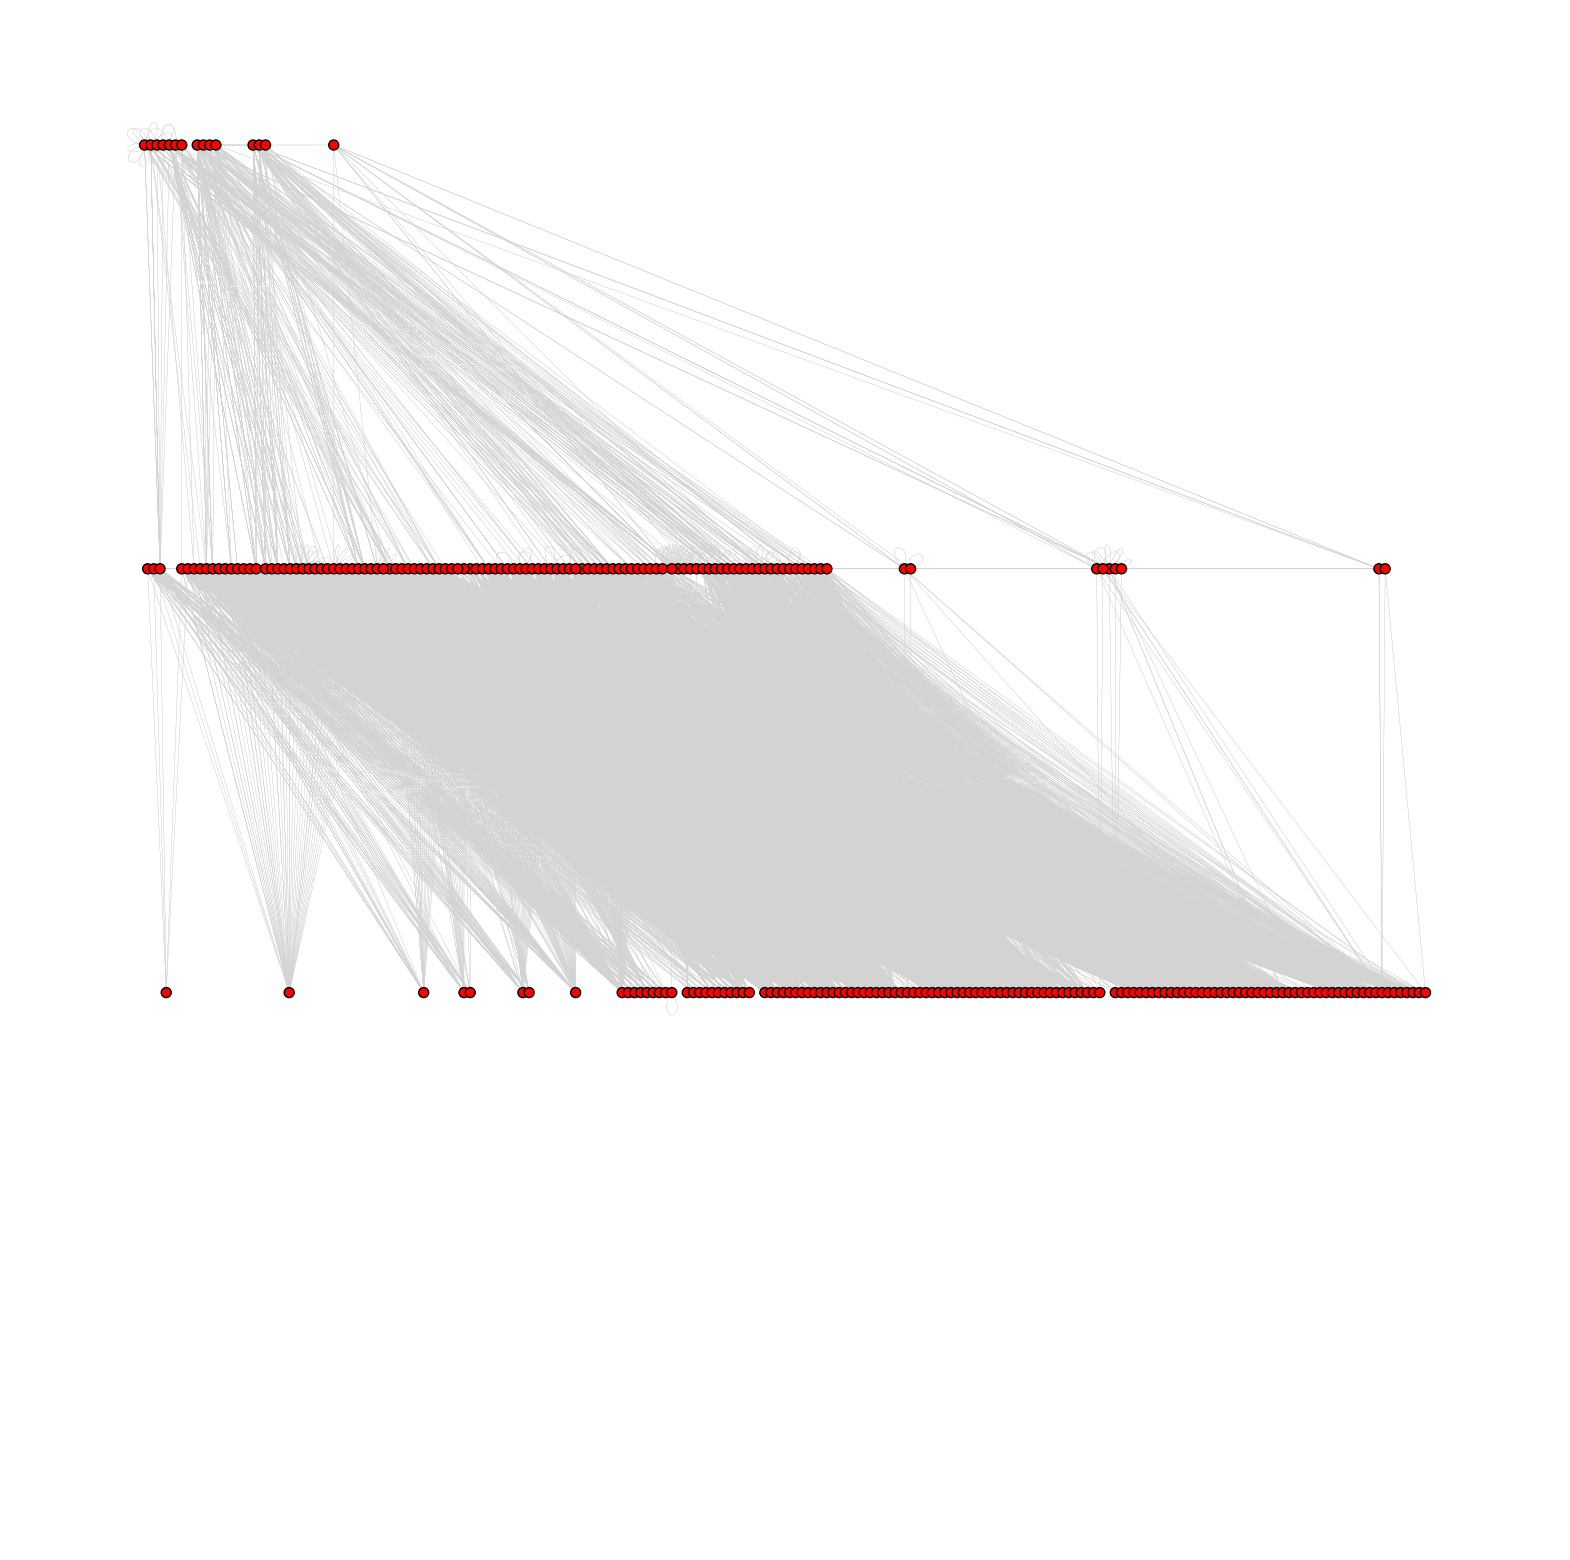

In [4]:
layout = g.layout(layout=ig.Graph.layout_reingold_tilford)

fig, ax = plt.subplots(figsize=(20,20))

ig.plot(g,
        target=ax,
        layout=layout,
        vertex_size= 10,
        edge_width=0.2,
        edge_color='lightgray',
        edge_arrow_size=1,
        edge_arrow_width=1,
    )
plt.show()